In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("mall - mall.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=df.drop(columns=['CustomerID','Genre'])

In [5]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
x=df.iloc[:,[0,1]].values

In [10]:
from sklearn.cluster import KMeans

In [9]:
import matplotlib.pyplot as plt

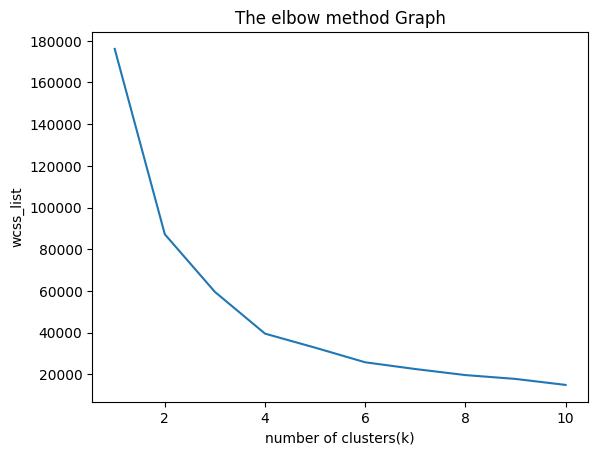

In [13]:
a=[]
for i in range(1,11):
    b=KMeans(n_clusters=i,init='k-means++',random_state=42)
    b.fit(x)
    a.append(b.inertia_)
plt.plot(range(1,11),a)

plt.title('The elbow method Graph')
plt.xlabel("number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

from the above plot we can see the elbow point is at 4 so the number of clusters here will be 4

In [14]:
b=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_predict=b.fit_predict(x)

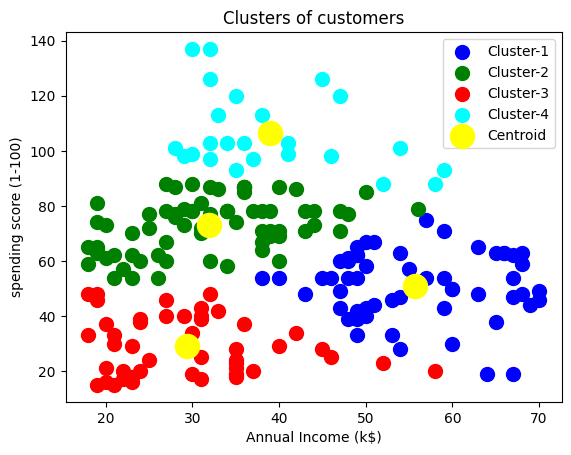

In [17]:
#visualizing the clusters
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='blue',label='Cluster-1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='green',label='Cluster-2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='red',label='Cluster-3')
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100,c='cyan',label='Cluster-4')

plt.scatter(b.cluster_centers_[:,0],b.cluster_centers_[:,1],s=300,c='yellow',label='Centroid')
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("spending score (1-100)")
plt.legend()
plt.show()

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [19]:
df=pd.read_csv("Social_Network_Ads - Social_Network_Ads.csv")

In [20]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
df=df.drop(columns=['User ID','Gender'])
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [22]:
x=df.drop(columns=['Purchased'],axis=1)
y=df['Purchased']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=2)),
    ('classifier',RandomForestClassifier(n_estimators=100,random_state=42))
])

In [26]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [27]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [28]:
y_pred=pipe.predict(x_test)

In [29]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8875


In [45]:
df1=pd.read_csv("covid_toy - covid_toy.csv")
df1.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [32]:
df1.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [47]:
from sklearn.impute import SimpleImputer
df1.columns.tolist()

['age', 'gender', 'fever', 'cough', 'city', 'has_covid']

In [53]:
si=SimpleImputer()



In [49]:
df1=si.fit_transform(df1)